In [1]:
import numpy as np
from tqdm import tqdm
import sys
import os
from collections import Counter
import math
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import time
import matplotlib.gridspec as gridspec
import importlib
from collections import namedtuple
import cupy
import random
import json
import pandas as pd

from prettytable import PrettyTable

%matplotlib inline

In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [3]:
sns.set_style("whitegrid", {"axes.grid": True})

In [4]:
fisher_dev_refs_en = pickle.load(open("./mfcc_13dim/fisher_dev_eval.en", "rb"))
fisher_dev_refs_es = pickle.load(open("./mfcc_13dim/fisher_dev_eval.es", "rb"))

In [5]:
fisher_es_en_sim = pickle.load(open("./mfcc_13dim/fisher_es_en_sim.dict", "rb"))

In [6]:
fisher_dev_ids = []
with open("./mfcc_13dim/fisher_dev_eval.ids", "r") as in_f:
    for line in in_f:
        fisher_dev_ids.append(line.strip())

### Precision/Recall

In [4]:
hrs = [0, 2.5, 5, 10, 20, 50]
x_scale = np.array(hrs)
x_labels = [str(i)+"h" for i in hrs]

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

plot_style = {
    "baseline": {"color": tableau20[8], "linestyle": ":", "alpha": 0.9, "marker": "."},
    "en-300h": {"color": tableau20[8], "linestyle": "-", "alpha": 0.8, "marker": "."}
}

common_params = {"markersize":20, "markerfacecolor":"w", "markeredgewidth":3, "linewidth":4}


x_points = np.linspace(0, 100, len(x_scale))
for p in plot_style:
    y_vals = []
    for m in scores.keys():
        y_vals.append(scores[m][p]["prec."])
    y_points = np.array(y_vals)
    print(y_points)
    ax.plot(x_points, y_points, 
            label=p, **plot_style[p], **common_params)

# end for
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

ax.axhline(y=20.5, linestyle="--", color='k')
plt.text(75, 23, r'naive baseline', fontdict=font)

ax.set_xlabel('# hrs of training data', size=24)
ax.set_ylabel('Precision', size=24)


# plt.ylim(0,30)
# plt.xlim(0,51)

plt.xticks(x_points, x_labels, rotation=0, fontsize=24)
plt.yticks(list(range(0,71,10)), rotation=0, fontsize=24)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(22) 
plt.legend(bbox_to_anchor=(0.8, 1.0), framealpha=0, fontsize=22, ncol=2)
plt.tight_layout()

plt.savefig("./figs/meteor_rec_prec.pdf", dpi=300, bbox_inches='tight')

## BLEU scores with and without pre-trained ASR

In [26]:
hrs = [0, 2.5, 5, 10, 20, 50]
x_scale = np.array(hrs)
x_labels = [str(i)+"h" for i in hrs]
x_points = np.linspace(0, 100, len(x_scale))

prec_base = np.array([0,   21.4, 19.6, 21.1, 40.9, 53.9])
prec_asr = np.array([14.6, 31.9, 37.2, 44.3, 50.5, 58.1])
rec_base = np.array([0,    20.6, 19.5, 21.1, 37.7, 51.1])
rec_asr = np.array([20.9,  29.2, 35,   41.6, 48.5, 56])

bleu_base = np.array([0,   2,   1.9, 2.2,  10.8, 23.3])
bleu_asr = np.array([ 1.1, 5.8, 9.1, 14.3, 19.9, 27.8])

bleu_test_base = np.array([0, ])
bleu_test_asr = np.array([ ])

In [21]:
x_points[-1] = 110

In [18]:
log_hrs = np.log(hrs[1:])

In [19]:
log_hrs

array([0.91629073, 1.60943791, 2.30258509, 2.99573227, 3.91202301])

In [6]:
dcolors = [(215,25,28),
            (253,174,97),
            (255,255,191),
            (171,221,164),
            (43,131,186)]
for i in range(len(dcolors)):    
    r, g, b = dcolors[i]    
    dcolors[i] = (r / 255., g / 255., b / 255.)

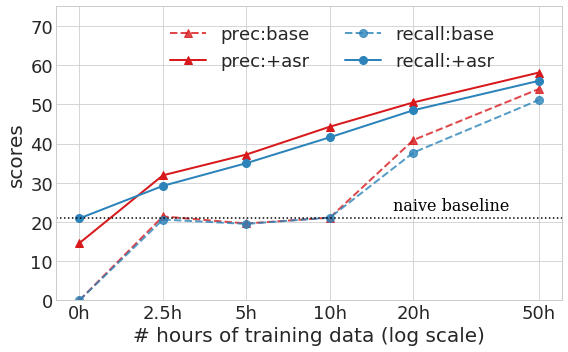

In [24]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1, sharey=True)

markersize = 8
linewidth = 2
alpha = 1

ax.plot(x_points, prec_base, label="prec:base", color=dcolors[0], 
        linewidth=linewidth, marker='^', 
        markersize=markersize, linestyle="--", alpha=0.8)

ax.plot(x_points, prec_asr, label="prec:+asr", color=dcolors[0], 
        linewidth=linewidth, marker='^', markersize=markersize, linestyle="-")

ax.plot(x_points, rec_base, label="recall:base", color=dcolors[4], 
        linewidth=linewidth, marker='o', markersize=markersize, linestyle="--", alpha=0.8)

ax.plot(x_points, rec_asr, label="recall:+asr", color=dcolors[4], 
        linewidth=linewidth, marker='o', markersize=markersize, linestyle="-")

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

ax.axhline(y=21, linestyle=":", color='k')
plt.text(75, 23, r'naive baseline', fontdict=font)

plt.xticks(x_points, x_labels, rotation=0, fontsize=18)
# plt.yticks(list(range(0,65,10))+[76, 71, ], rotation=0, fontsize=20)
plt.yticks(list(range(0,81,10)), rotation=0, fontsize=20)
ax.set_xlabel('# hours of training data (log scale)', size=20)
ax.set_ylabel('scores', size=20)
for i in ax.get_xticklabels():
    i.set_fontsize(18)
for i in ax.get_yticklabels():
    i.set_fontsize(18)

plt.legend(bbox_to_anchor=(0.9, 0.99), framealpha=0, fontsize=18, ncol=2)
plt.ylim(0,75)
# plt.xlim(1,101)
# ax.xaxis.grid(False)

# sns.despine(left=True, bottom=True)

fig.tight_layout()

fig.savefig(fname="./figs/st_asr_prec_rec.pdf", dpi=300)
fig.savefig(fname="./figs/st_asr_prec_rec.png", dpi=300)

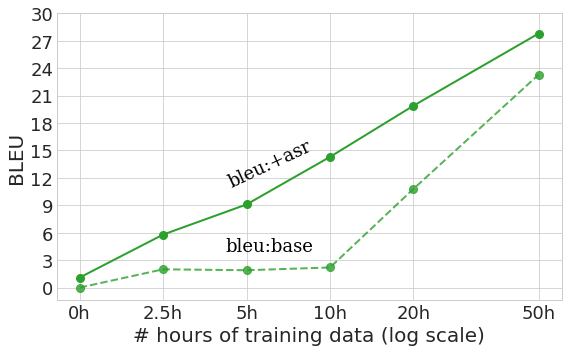

In [25]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1, sharey=True)

markersize = 8
linewidth = 2
alpha = 1

ax.plot(x_points, bleu_base, label="bleu:base", color=tableau20[4], 
        linewidth=linewidth, marker='o', 
        markersize=markersize, linestyle="--", alpha=0.8)

ax.plot(x_points, bleu_asr, label="bleu:+asr", color=tableau20[4], 
        linewidth=linewidth, marker='o', markersize=markersize, linestyle="-")

plt.xticks(x_points, x_labels, rotation=0, fontsize=18)
# plt.yticks(list(range(0,65,10))+[76, 71, ], rotation=0, fontsize=20)
plt.yticks(list(range(0,33,3)), rotation=0, fontsize=20)
ax.set_xlabel('# hours of training data (log scale)', size=20)
ax.set_ylabel('BLEU', size=20)
for i in ax.get_xticklabels():
    i.set_fontsize(18)
for i in ax.get_yticklabels():
    i.set_fontsize(18)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

# ax.axhline(y=30, linestyle=":", color='k')
plt.text(35, 15, r'bleu:+asr', fontdict=font, rotation=25)

plt.text(35, 4, r'bleu:base', fontdict=font, rotation=0)
    
# plt.legend(bbox_to_anchor=(0.9, 0.99), framealpha=0, fontsize=18, ncol=2)
# plt.ylim(0,75)
# plt.xlim(1,101)
# ax.xaxis.grid(False)

# sns.despine(left=True, bottom=True)

fig.tight_layout()

fig.savefig(fname="./figs/st_asr_bleu.pdf", dpi=300)
fig.savefig(fname="./figs/st_asr_bleu.png", dpi=300)

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

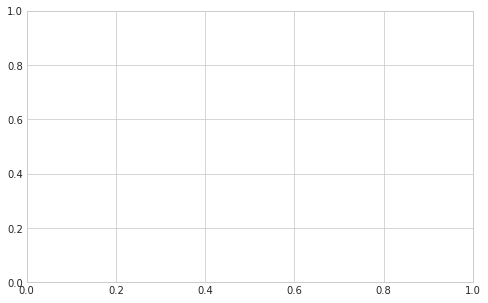

In [27]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1, sharey=True)

markersize = 8
linewidth = 2
alpha = 1

ax.plot(x_points, bleu_test_base, label="bleu:base", color=tableau20[4], 
        linewidth=linewidth, marker='o', 
        markersize=markersize, linestyle="--", alpha=0.8)

ax.plot(x_points, bleu_test_asr, label="bleu:+asr", color=tableau20[4], 
        linewidth=linewidth, marker='o', markersize=markersize, linestyle="-")

plt.xticks(x_points, x_labels, rotation=0, fontsize=18)
# plt.yticks(list(range(0,65,10))+[76, 71, ], rotation=0, fontsize=20)
plt.yticks(list(range(0,33,3)), rotation=0, fontsize=20)
ax.set_xlabel('# hours of training data (log scale)', size=20)
ax.set_ylabel('BLEU', size=20)
for i in ax.get_xticklabels():
    i.set_fontsize(18)
for i in ax.get_yticklabels():
    i.set_fontsize(18)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

# ax.axhline(y=30, linestyle=":", color='k')
plt.text(35, 15, r'bleu:+asr', fontdict=font, rotation=25)

plt.text(35, 4, r'bleu:base', fontdict=font, rotation=0)
    
# plt.legend(bbox_to_anchor=(0.9, 0.99), framealpha=0, fontsize=18, ncol=2)
# plt.ylim(0,75)
# plt.xlim(1,101)
# ax.xaxis.grid(False)

# sns.despine(left=True, bottom=True)

fig.tight_layout()

fig.savefig(fname="./figs/st_asr_bleu_test.pdf", dpi=300)
fig.savefig(fname="./figs/st_asr_bleu_test.png", dpi=300)

In [8]:
hrs = [0, 100, 300]
x_scale = np.array(hrs)
x_labels = [str(i)+"h" for i in hrs]
# x_points = np.linspace(0, 100, len(x_scale))
x_points = np.array([0, 33, 100])

sp_en_20h = np.array([10.8, 16.8, 19.9])
sp_en_50h = np.array([23.3, 23.6, 27.8])

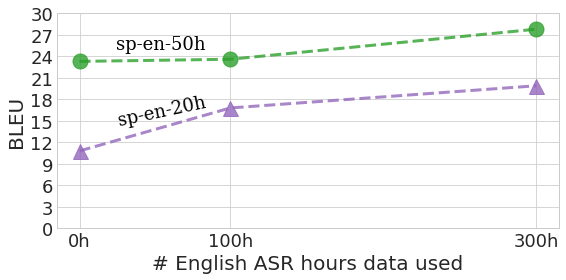

In [15]:
fig, ax = plt.subplots(figsize=(8,4),nrows=1, ncols=1, sharey=True)

markersize = 15
linewidth = 3
alpha = 1

ax.plot(x_points, sp_en_20h, label="sp-en-20h", color=tableau20[8], 
        linewidth=linewidth, marker='^', 
        markersize=markersize, linestyle="--", alpha=0.8)

ax.plot(x_points, sp_en_50h, label="sp-en-50h", color=tableau20[4], 
        linewidth=linewidth, marker='o', markersize=markersize, linestyle="--", alpha=0.8)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

# ax.axhline(y=30, linestyle=":", color='k')
plt.text(8, 17, r'sp-en-20h', fontdict=font, rotation=12)

plt.text(8, 25, r'sp-en-50h', fontdict=font, rotation=0)

plt.xticks(x_points, x_labels, rotation=0, fontsize=18)
plt.yticks(list(range(0,31,3)), rotation=0, fontsize=20)
ax.set_xlabel('# English ASR hours data used', size=20)
ax.set_ylabel('BLEU', size=20)
for i in ax.get_xticklabels():
    i.set_fontsize(18)
for i in ax.get_yticklabels():
    i.set_fontsize(18)

# plt.legend(bbox_to_anchor=(0.85, 0.35), framealpha=0, fontsize=18, ncol=2)

# sns.despine(left=True, bottom=True)

fig.tight_layout()

fig.savefig(fname="./figs/st_asr_data.pdf", dpi=300)

In [52]:
scores = {x:{} for x in x_labels}

In [53]:
scores["0h"]["baseline"] = {"bleu": 0, 
                              "meteor": 0,
                              "prec.": 0,
                              "rec.": 0}

scores["0h"]["en-300h"] = {"bleu": 1.1, 
                              "meteor": 8.3,
                              "prec.": 17.1,
                              "rec.": 20.8}


scores["2.5h"]["baseline"] = {"bleu": 2, 
                              "meteor": 9,
                              "prec.": 23.2,
                              "rec.": 20.4}

scores["2.5h"]["en-300h"] = {"bleu": 5.6, 
                              "meteor": 13,
                              "prec.": 34.4,
                              "rec.": 28.7}


scores["5h"]["baseline"] = {"bleu": 1.9, 
                              "meteor": 8.6,
                              "prec.": 20.7,
                              "rec.": 19.7}

scores["5h"]["en-300h"] = {"bleu": 9, 
                              "meteor": 15.9,
                              "prec.": 41.7,
                              "rec.": 34.6}


scores["10h"]["baseline"] = {"bleu": 2.2, 
                              "meteor": 9.2,
                              "prec.": 23.2,
                              "rec.": 20.8}

scores["10h"]["en-300h"] = {"bleu": 14.1, 
                              "meteor": 19.3,
                              "prec.": 49.2,
                              "rec.": 41.1}

scores["20h"]["baseline"] = {"bleu": 10.8, 
                              "meteor": 17.5,
                              "prec.": 44.2,
                              "rec.": 37.7}

scores["20h"]["en-300h"] = {"bleu": 19.8, 
                              "meteor": 22.9,
                              "prec.": 55.6,
                              "rec.": 47.8}

scores["50h"]["baseline"] = {"bleu": 23.3, 
                              "meteor": 24.7,
                              "prec.": 58.3,
                              "rec.": 51.1}

scores["50h"]["en-300h"] = {"bleu": 27.3, 
                              "meteor": 27.1,
                              "prec.": 63.5,
                              "rec.": 55.2}

[ 0.   2.   1.9  2.2 10.8 23.3]
[ 1.1  5.6  9.  14.1 19.8 27.3]


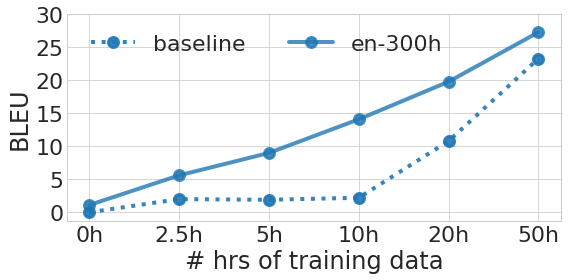

In [161]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)

plot_style = {
    "baseline": {"color": tableau20[0], "linestyle": ":", "alpha": 0.9, "marker": "."},
    "en-300h": {"color": tableau20[0], "linestyle": "-", "alpha": 0.8, "marker": "."}
}

common_params = {"markersize":20, "markerfacecolor":"w", "markeredgewidth":3, 
                 "linewidth":4, "markerfacecolor":tableau20[0]}

x_points = np.linspace(0, 100, len(x_scale))
for p in plot_style:
    y_vals = []
    for m in scores.keys():
        y_vals.append(scores[m][p]["bleu"])
    y_points = np.array(y_vals)
    print(y_points)
    ax.plot(x_points, y_points, 
            label=p, **plot_style[p], **common_params)
# end for

ax.set_xlabel('# hrs of training data', size=24)
ax.set_ylabel('BLEU', size=24)

plt.xticks(x_points, x_labels, rotation=0, fontsize=24)
plt.yticks(list(range(0,31,5)), rotation=0, fontsize=24)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(22) 
plt.legend(bbox_to_anchor=(0.8, 1.0), framealpha=0, fontsize=22, ncol=2)
plt.tight_layout()

plt.savefig("./figs/st_asr_bleu.pdf", dpi=300, bbox_inches='tight')

[ 0.   9.   8.6  9.2 17.5 24.7]
[ 8.3 13.  15.9 19.3 22.9 27.1]


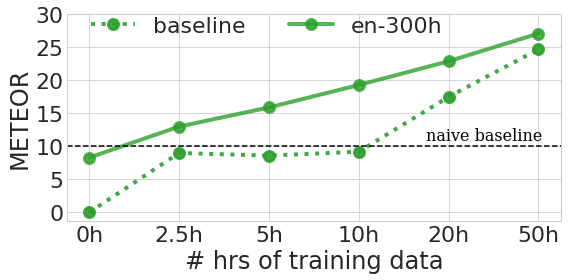

In [171]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)

plot_style = {
    "baseline": {"color": tableau20[4], "linestyle": ":", "alpha": 0.9, "marker": "."},
    "en-300h": {"color": tableau20[4], "linestyle": "-", "alpha": 0.8, "marker": "."}
}

common_params = {"markersize":20, "markerfacecolor":"w", 
                 "markeredgewidth":3, "linewidth":4, "markerfacecolor":tableau20[4]}


x_points = np.linspace(0, 100, len(x_scale))
for p in plot_style:
    y_vals = []
    for m in scores.keys():
        y_vals.append(scores[m][p]["meteor"])
    y_points = np.array(y_vals)
    print(y_points)
    ax.plot(x_points, y_points, 
            label=p, **plot_style[p], **common_params)
# end for

font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

ax.axhline(y=10.1, linestyle="--", color='k')
plt.text(75, 11, r'naive baseline', fontdict=font)

ax.set_xlabel('# hrs of training data', size=24)
ax.set_ylabel('METEOR', size=24)

plt.xticks(x_points, x_labels, rotation=0, fontsize=24)
plt.yticks(list(range(0,31,5)), rotation=0, fontsize=24)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(22) 
plt.legend(bbox_to_anchor=(0.8, 0.8), framealpha=0, fontsize=22, ncol=2)
plt.tight_layout()

plt.savefig("./figs/st_asr_meteor.pdf", dpi=300, bbox_inches='tight')

[ 0.  23.2 20.7 23.2 44.2 58.3]
[17.1 34.4 41.7 49.2 55.6 63.5]


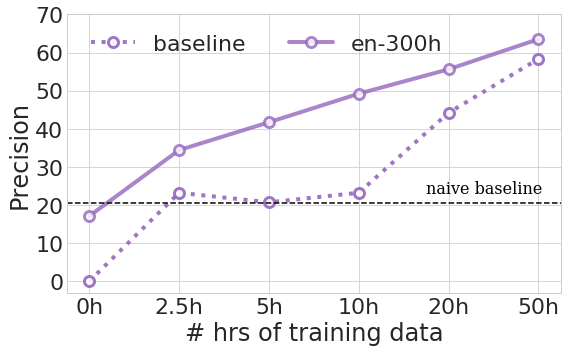

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

plot_style = {
    "baseline": {"color": tableau20[8], "linestyle": ":", "alpha": 0.9, "marker": "."},
    "en-300h": {"color": tableau20[8], "linestyle": "-", "alpha": 0.8, "marker": "."}
}

common_params = {"markersize":20, "markerfacecolor":"w", "markeredgewidth":3, "linewidth":4}


x_points = np.linspace(0, 100, len(x_scale))
for p in plot_style:
    y_vals = []
    for m in scores.keys():
        y_vals.append(scores[m][p]["prec."])
    y_points = np.array(y_vals)
    print(y_points)
    ax.plot(x_points, y_points, 
            label=p, **plot_style[p], **common_params)

# end for
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

ax.axhline(y=20.5, linestyle="--", color='k')
plt.text(75, 23, r'naive baseline', fontdict=font)

ax.set_xlabel('# hrs of training data', size=24)
ax.set_ylabel('Precision', size=24)


# plt.ylim(0,30)
# plt.xlim(0,51)

plt.xticks(x_points, x_labels, rotation=0, fontsize=24)
plt.yticks(list(range(0,71,10)), rotation=0, fontsize=24)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(22) 
plt.legend(bbox_to_anchor=(0.8, 1.0), framealpha=0, fontsize=22, ncol=2)
plt.tight_layout()

plt.savefig("./figs/st_asr_prec.pdf", dpi=300, bbox_inches='tight')

[ 0.  20.4 19.7 20.8 37.7 51.1]
[20.8 28.7 34.6 41.1 47.8 55.2]


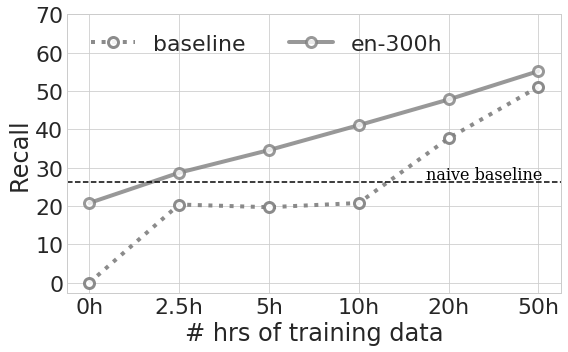

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

plot_style = {
    "baseline": {"color": tableau20[14], "linestyle": ":", "alpha": 0.9, "marker": "."},
    "en-300h": {"color": tableau20[14], "linestyle": "-", "alpha": 0.8, "marker": "."}
}

common_params = {"markersize":20, "markerfacecolor":"w", "markeredgewidth":3, "linewidth":4}


x_points = np.linspace(0, 100, len(x_scale))
for p in plot_style:
    y_vals = []
    for m in scores.keys():
        y_vals.append(scores[m][p]["rec."])
    y_points = np.array(y_vals)
    print(y_points)
    ax.plot(x_points, y_points, 
            label=p, **plot_style[p], **common_params)
#end for

ax.axhline(y=26.4, linestyle="--", color='k')
plt.text(75, 27, r'naive baseline', fontdict=font)

ax.set_xlabel('# hrs of training data', size=24)
ax.set_ylabel('Recall', size=24)


# plt.ylim(0,30)
# plt.xlim(0,51)

plt.xticks(x_points, x_labels, rotation=0, fontsize=24)
plt.yticks(list(range(0,71,10)), rotation=0, fontsize=24)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(22) 
plt.legend(bbox_to_anchor=(0.8, 1.0), framealpha=0, fontsize=22, ncol=2)
plt.tight_layout()

plt.savefig("./figs/st_asr_rec.pdf", dpi=300, bbox_inches='tight')

In [28]:
scores_pd = pd.DataFrame.from_dict(scores)

In [29]:
scores_pd

,0h,10h,2.5h,20h,50h,5h
baseline,"{'bleu': 0, 'meteor': 0, 'prec.': 0, 'rec.': 0}","{'bleu': 2.2, 'meteor': 9.2, 'prec.': 23.2, 'r...","{'bleu': 2, 'meteor': 9, 'prec.': 23.2, 'rec.'...","{'bleu': 10.8, 'meteor': 17.5, 'prec.': 44.2, ...","{'bleu': 23.3, 'meteor': 24.7, 'prec.': 58.3, ...","{'bleu': 1.9, 'meteor': 8.6, 'prec.': 20.7, 'r..."
en-300h,"{'bleu': 1.1, 'meteor': 8.3, 'prec.': 17.1, 'r...","{'bleu': 14.1, 'meteor': 19.3, 'prec.': 49.2, ...","{'bleu': 5.6, 'meteor': 13, 'prec.': 34.4, 're...","{'bleu': 19.8, 'meteor': 22.9, 'prec.': 55.6, ...","{'bleu': 27.3, 'meteor': 27.1, 'prec.': 63.5, ...","{'bleu': 9, 'meteor': 15.9, 'prec.': 41.7, 're..."


In [9]:
from IPython.display import HTML

In [10]:
from prettytable import PrettyTable
x = PrettyTable()
x.border = False

x.field_names = ["Spanish speech (hrs)", "Eng. ASR utts", "ASR WER", "BLEU", "METEOR", "Precision", "Recall"]

x.add_row([5, 0, "NA", 1.95, 8.6, 20.7, 19.3])
x.add_row([5, "100K", 35, 8.06, 14.5, 40.4, 31.4])

x.add_row([10, 0, "NA", 2.24, 9.2, 23.2, 20.8])
x.add_row([10, "100K", 35, 11.3, 17.4, 45.3, 37.3])

x.add_row([20, 0, "NA", 10.87, 17.5, 44.2, 37.7])
x.add_row([20, "100K", 35, 16.63, 21.3, 51.5, 45])

# print(x)
h = x.get_html_string()
HTML(h)

Spanish speech (hrs),Eng. ASR utts,ASR WER,BLEU,METEOR,Precision,Recall
5,0,NA,1.95,8.6,20.7,19.3
5,100K,35,8.06,14.5,40.4,31.4
10,0,NA,2.24,9.2,23.2,20.8
10,100K,35,11.3,17.4,45.3,37.3
20,0,NA,10.87,17.5,44.2,37.7
20,100K,35,16.63,21.3,51.5,45


## 20 hrs model comparison

In [101]:
models = {
    "base":"./interspeech_bpe/sp_20hrs_best_bn-nobias_batch-32_buck-n25-w80",
    "+asr:cnn":"./experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_enc-cnn-only",
    "+asr:enc":"experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_enc-only",
    "+asr:dec":"./experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_dec-only",
    "+asr:all":"./experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_enc-attn-dec"
}

In [102]:
log_train = {}
log_dev = {}
for m in models:
    log_train[m] = np.genfromtxt(os.path.join(models[m], "train.log"), 
                               delimiter=',', usecols = (0,1,2)).transpose()
    log_dev[m] = np.genfromtxt(os.path.join(models[m], "dev.log"), 
                               delimiter=',', usecols = (0,1,2)).transpose()
    

In [103]:
plot_style = {
    "+asr:all": {"color": tableau20[4], "linestyle": "-", "alpha": 0.9, "marker": "o", "markevery":5, "markerfacecolor":tableau20[4]},
    "+asr:enc": {"color": tableau20[0], "linestyle": "--", "alpha": 0.7, "marker": "x", "markevery":5, "markerfacecolor":tableau20[0]},
    "+asr:dec": {"color": tableau20[0], "linestyle": ":", "alpha": 0.7, "marker": "^", "markevery":4, "markerfacecolor":tableau20[0]},
    "+asr:cnn": {"color": tableau20[0], "linestyle": "-.", "alpha": 0.6, "marker": "s", "markevery":7, "markerfacecolor":tableau20[0]},
    "base": {"color": tableau20[8], "linestyle": "-", "alpha": 0.8, "marker": ".", "markevery":3, "markerfacecolor":tableau20[8]}
}

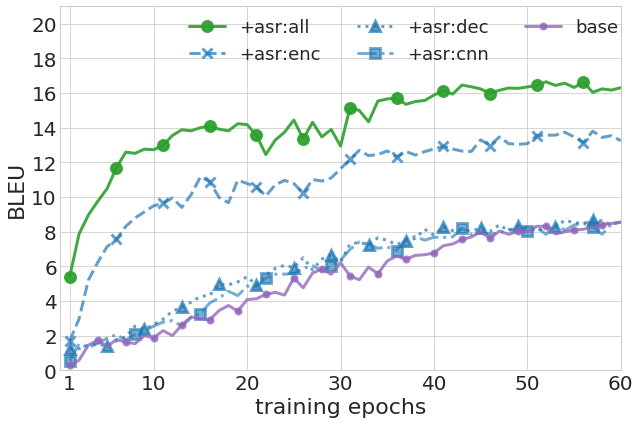

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)

common_params = {"markersize":10,
                 "markeredgewidth":3, "linewidth":3, "fillstyle": "full"}

# marker_style = dict(color='cornflowerblue', linestyle=':', marker='o',
#                     markersize=15, markerfacecoloralt='gray')

for m in plot_style:
    y_points = log_dev[m][2][:60]*100
    shorten_y = y_points
    x_points = np.arange(1,len(y_points)+1)
    
    ax.plot(x_points, shorten_y, 
            label=m, **plot_style[m], **common_params)


ax.set_xlabel('training epochs', size=22)
ax.set_ylabel('BLEU', size=22)

# end for
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

# ax.axhline(y=8.5, linestyle="--", color='k', alpha=0.6)
# plt.text(10, 9, r'baseline best', fontdict=font)

# plt.text(10, 6, r'baseline', fontdict=font, rotation=20, color=tableau20[8])
# plt.text(10, 16, r'+ Eng. ASR', fontdict=font, rotation=20)


plt.ylim(0,21)
plt.xlim(0,60)

plt.xticks([1]+list(range(10,max(x_points)+1,10)), rotation=0, fontsize=20)
plt.yticks(list(range(0,22,2)), rotation=0, fontsize=20)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(20) 
# end for
handles, labels = ax.get_legend_handles_labels()

# reverse the order
plt.legend(handles[::1], labels[::1], bbox_to_anchor=(0.2, 0.80), framealpha=0, fontsize=18, ncol=3)
plt.tight_layout()

plt.savefig("./figs/st_asr_bleu_params_train.pdf", dpi=300, bbox_inches='tight')

In [35]:
models = {
    "baseline":"./interspeech_bpe/sp_20hrs_best_bn-nobias_batch-32_buck-n25-w80",
#     "20h+asr:enc":"./experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_enc-only",
#     "20h+asr:dec":"./experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_dec-only",
    "+ Eng. asr":"./experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_enc-attn-dec",
#     "20h+asr:fr":"./experiments/nmt_asr/sp-20hrs_gpfr-ep30_enc-only"
}

In [36]:
log_train = {}
log_dev = {}
for m in models:
    log_train[m] = np.genfromtxt(os.path.join(models[m], "train.log"), 
                               delimiter=',', usecols = (0,1,2)).transpose()
    log_dev[m] = np.genfromtxt(os.path.join(models[m], "dev.log"), 
                               delimiter=',', usecols = (0,1,2)).transpose()
    

In [48]:
plot_style = {
    "baseline": {"color": tableau20[8], "linestyle": ":", "alpha": 0.9, "marker": "."},
#     "20h+asr:dec": {"color": tableau20[0], "linestyle": "-.", "alpha": 0.8, "marker": "+"},
#     "20h+asr:enc": {"color": tableau20[0], "linestyle": "--", "alpha": 0.7, "marker": "o"},
    "+ Eng. asr": {"color": tableau20[0], "linestyle": "-", "alpha": 0.9, "marker": "."},
#     "20h+asr:fr": {"color": tableau20[4], "linestyle": "-", "alpha": 0.9, "marker": "*"},
}

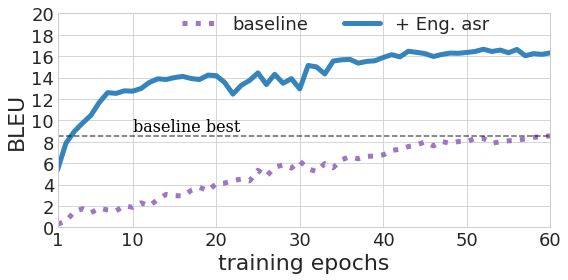

In [104]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)

common_params = {"markersize":0, "markerfacecolor":"w", "markeredgewidth":3, "linewidth":5}

for m in plot_style:
    y_points = log_dev[m][2]*100
    x_points = np.arange(1,len(y_points)+1)
    
    ax.plot(x_points, y_points, 
            label=m, **plot_style[m], **common_params)

# ax.plot(log_dev["20hrs+asr_full"][0]-25, log_dev["20hrs+asr_full"][2]*100, 
#         color=tableau20[0], linestyle="-", label="20hrs+asr_full",
#         marker='o', markersize=2, markerfacecolor="w", markeredgewidth=3)

# ax.plot(log_dev["20hrs+asr_full"][0]-25, log_dev["20hrs+asr_full"][2]*100, 
#         color=tableau20[0], linestyle="-", label="20hrs+ASR full",
#         marker='^', markersize=1, markerfacecolor="w", markeredgewidth=3)

ax.set_xlabel('training epochs', size=22)
ax.set_ylabel('BLEU', size=22)

# end for
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

ax.axhline(y=8.5, linestyle="--", color='k', alpha=0.6)
plt.text(10, 9, r'baseline best', fontdict=font)

# plt.text(10, 6, r'baseline', fontdict=font, rotation=20, color=tableau20[8])
# plt.text(10, 16, r'+ Eng. ASR', fontdict=font, rotation=20)


plt.ylim(0,20)
plt.xlim(1,60)

plt.xticks([1]+list(range(10,len(y_points)+1,10)), rotation=0, fontsize=16)
plt.yticks(list(range(0,21,2)), rotation=0, fontsize=16)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(18) 
plt.legend(bbox_to_anchor=(0.22, 0.83), framealpha=0, fontsize=18, ncol=2)
plt.tight_layout()

plt.savefig("./figs/st_asr_bleu_train.pdf", dpi=300, bbox_inches='tight')

## Mboshi model comparison

In [17]:
models = {
    "mb-fr-4h":"experiments/nmt_asr/mboshi-kaldi_swbd1-train_nodev_ep25_bpe_baseline",
    "+fr-20h:all":"experiments/nmt_asr/mboshi-kaldi_gpfr-ep30_bpe_trial2",
    "+en-300h:enc":"experiments/nmt_asr/mboshi-kaldi_swbd1-ep25_bpe_trial-3",
    "+en-300h:enc+fr-20h:dec": "experiments/nmt_asr/mboshi-kaldi_swbd1-gpfr_bpe"
}

In [18]:
log_train = {}
log_dev = {}
for m in models:
    log_train[m] = np.genfromtxt(os.path.join(models[m], "train.log"), 
                               delimiter=',', usecols = (0,1,2)).transpose()
    log_dev[m] = np.genfromtxt(os.path.join(models[m], "dev.log"), 
                               delimiter=',', usecols = (0,1,2)).transpose()
    

In [19]:
plot_style = {
    "mb-fr-4h": {"color": tableau20[8], "linestyle": ":", "alpha": 0.9, "marker": "^"},
    "+fr-20h:all": {"color": tableau20[0], "linestyle": "-.", "alpha": 0.8, "marker": "+"},
    "+en-300h:enc": {"color": tableau20[0], "linestyle": "--", "alpha": 0.7, "marker": "o"},
    "+en-300h:enc+fr-20h:dec": {"color": tableau20[0], "linestyle": "-", "alpha": 0.9, "marker": "x"},
}

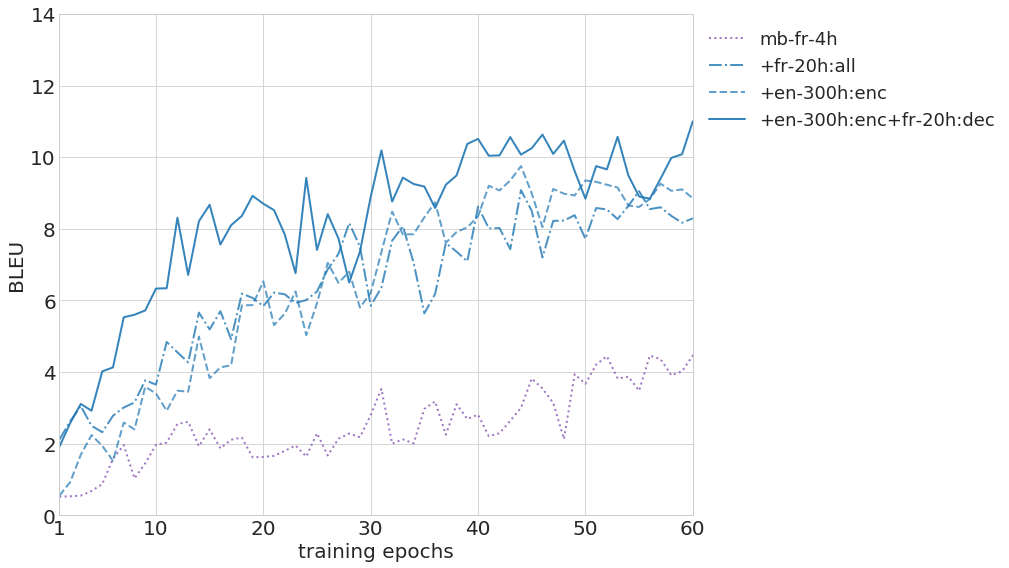

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

common_params = {"markersize":0, "markerfacecolor":"w", "markeredgewidth":3, "linewidth":2}

for m in plot_style:
    y_points = log_dev[m][2]*100
    x_points = np.arange(1,len(y_points)+1)
    
    ax.plot(x_points, y_points, 
            label=m, **plot_style[m], **common_params)

# ax.plot(log_dev["20hrs+asr_full"][0]-25, log_dev["20hrs+asr_full"][2]*100, 
#         color=tableau20[0], linestyle="-", label="20hrs+asr_full",
#         marker='o', markersize=2, markerfacecolor="w", markeredgewidth=3)

# ax.plot(log_dev["20hrs+asr_full"][0]-25, log_dev["20hrs+asr_full"][2]*100, 
#         color=tableau20[0], linestyle="-", label="20hrs+ASR full",
#         marker='^', markersize=1, markerfacecolor="w", markeredgewidth=3)

ax.set_xlabel('training epochs', size=20)
ax.set_ylabel('BLEU', size=20)


plt.ylim(0,10)
plt.xlim(1,60)

plt.xticks([1]+list(range(10,len(y_points)+1,10)), rotation=0, fontsize=20)
plt.yticks(list(range(0,15,2)), rotation=0, fontsize=20)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(20) 
plt.legend(bbox_to_anchor=(1.0, 1.0), framealpha=0, fontsize=18, ncol=1)
plt.tight_layout()

plt.savefig("st_mb_fr_bleu.pdf", dpi=300, bbox_inches='tight')

### Fisher dev breakdown

In [36]:
model_meteor_path = {}

model_meteor_path["google"] = "./metrics/meteor_google.txt"
model_meteor_path["160hrs"] = "./metrics/meteor_160hrs_bn_nobias.txt"

for m in models:
    model_meteor_path[m] = os.path.join(models[m], "meteor_scores.txt")

In [37]:
def read_meteor_out(meteor_fname):
    meteor_score = {u: {} for u in fisher_dev_ids}
    with open(meteor_fname, "r") as in_f:
        for line in in_f:
            if line.startswith("Segment "):
                l = line.strip().split()
                
                uid = fisher_dev_ids[int(l[1])-1]
                prec = float(l[3])
                recall = float(l[4])
                frag = float(l[5])
                score = float(l[6])
                
#                 meteor_score[uid] = {"p": prec, "r": recall, "frag": frag, "score": score}
                meteor_score[uid] = float("{0:.2f}".format(score))
            # end if segment level score
        # end for line in file
    # end with open
    return meteor_score

In [38]:
model_meteor_scores = {}
for m, meteor_fname in model_meteor_path.items():
    print(m)
    model_meteor_scores[m] = read_meteor_out(meteor_fname)

google
160hrs
20hrs
20hrs+asr
20hrs+asr_full


FileNotFoundError: [Errno 2] No such file or directory: './experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25/meteor_scores.txt'

In [39]:
df = pd.DataFrame(model_meteor_scores)

In [40]:
SIM_THRESH = 0.5
LEN_THRESH = 1

In [41]:
df["en_ref"] = pd.Series(fisher_dev_refs_en)
df["es_ref"] = pd.Series(fisher_dev_refs_es)

In [42]:
df["jaccard_sim"] = pd.Series(fisher_es_en_sim)
df["code_switch"] = df["jaccard_sim"] >= SIM_THRESH
df["min_len"] = df.es_ref.str.len() >= LEN_THRESH
df["es_len"] = df.es_ref.str.len()

In [43]:
df.columns

Index(['160hrs', '20hrs', '20hrs+asr', 'google', 'en_ref', 'es_ref',
       'jaccard_sim', 'code_switch', 'min_len', 'es_len'],
      dtype='object')

In [44]:
cols_to_show = ['20hrs', '20hrs+asr','code_switch',
       'en_ref', 'es_ref', 'es_len']

In [45]:
df[cols_to_show].head()

,20hrs,20hrs+asr,code_switch,en_ref,es_ref,es_len
20051009_182032_217_fsp-A-1,1.00,1.00,False,"[[good, afternoon], [good, afternoon], [good, ...","[buenas, tardes]",2
20051009_182032_217_fsp-A-10,0.08,0.09,False,"[[yes, what, was, your, name, again, i, forgot...","[sí, cómo, se, llama, usted, otra, vez, se, me...",11
20051009_182032_217_fsp-A-100,0.24,0.22,False,"[[then, that's, where, we're, at, over, here, ...","[entonces, en, esa, andamos, por, acá, estoy]",7
20051009_182032_217_fsp-A-101,0.02,0.00,False,"[[working, as, a, teacher, spanish, teacher, a...","[trabajando, como, profesor, auxiliar, de, pro...",8
20051009_182032_217_fsp-A-102,0.16,0.10,False,"[[but, i'm, also, looking, at, what, are, the,...","[pero, también, viendo, a, ver, que, posibilid...",16


In [54]:
conditions_for_no_code_switching = (df.jaccard_sim <= 0) & (df.es_ref.str.len() >= 5)

In [63]:
df[cols_to_show][conditions_for_no_code_switching].describe()

,20hrs,20hrs+asr,es_len
count,788.000000,788.000000,788.000000
mean,0.183464,0.226256,13.154822
std,0.134675,0.153134,7.891667
min,0.000000,0.000000,5.000000
25%,0.100000,0.140000,7.000000
50%,0.160000,0.200000,10.000000
75%,0.230000,0.280000,17.000000
max,1.000000,1.000000,50.000000


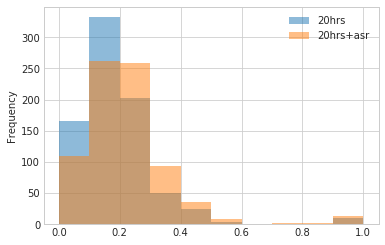

In [64]:
df[["20hrs", "20hrs+asr"]][conditions_for_no_code_switching].plot(kind='hist', alpha=0.5)

In [65]:
df[cols_to_show][conditions_for_no_code_switching].head()

,20hrs,20hrs+asr,code_switch,en_ref,es_ref,es_len
20051009_182032_217_fsp-A-100,0.24,0.22,False,"[[then, that's, where, we're, at, over, here, ...","[entonces, en, esa, andamos, por, acá, estoy]",7
20051009_182032_217_fsp-A-101,0.02,0.00,False,"[[working, as, a, teacher, spanish, teacher, a...","[trabajando, como, profesor, auxiliar, de, pro...",8
20051009_182032_217_fsp-A-104,0.28,0.25,False,"[[well, if, you, can, take, advantage, here, i...","[bueno, si, se, puede, aprovechar, aquí, no, e...",9
20051009_182032_217_fsp-A-13,0.34,0.36,False,"[[yes, and, have, you, been, living, here, a, ...","[sí, y, usted, hace, mucho, tiempo, que, que, ...",10
20051009_182032_217_fsp-A-132,0.09,0.09,False,"[[is, he, is, the, brother, he, is, brother, o...","[es, él, es, el, herma, él, es, hermano, de, su]",10


In [94]:
conditions_for_code_switching = (df.jaccard_sim >= 1.0) & (df.es_ref.str.len() >= 5)

In [95]:
df[cols_to_show][conditions_for_code_switching].describe()

,20hrs,20hrs+asr,es_len
count,32.000000,32.000000,32.000000
mean,0.077813,0.085625,14.468750
std,0.097938,0.172214,9.496975
min,0.000000,0.000000,5.000000
25%,0.017500,0.030000,6.000000
50%,0.045000,0.050000,12.000000
75%,0.095000,0.082500,18.000000
max,0.460000,1.000000,36.000000


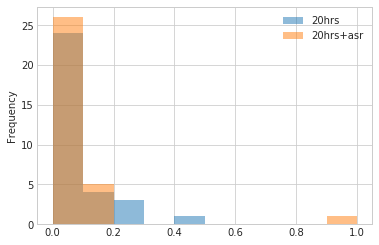

In [96]:
df[["20hrs", "20hrs+asr"]][conditions_for_code_switching].plot(kind='hist', alpha=0.5)

In [97]:
df[cols_to_show][conditions_for_code_switching].head()

,20hrs,20hrs+asr,code_switch,en_ref,es_ref,es_len
20051017_180712_270_fsp-A-5,0.08,0.09,True,"[[hmm, mm, i'm, i'm, coming, out], [hm, mm, i'...","[hm, mm, i, 'm, i, 'm, coming, out]",8
20051019_210146_289_fsp-B-1,0.20,0.08,True,"[[betsy, yeah, oh, hi, alex], [betsy, yeah, oh...","[betsy, yeap, oh, hi, alex]",5
20051026_180724_341_fsp-A-1,0.46,1.00,True,"[[hello, hello, g, hello, hello], [hello, hell...","[hello, hello, g, hello, hello]",5
20051026_180724_341_fsp-A-100,0.00,0.16,True,"[[eh, we, all, have, one], [eh, we, all, have,...","[eh, we, all, have, one]",5
20051026_180724_341_fsp-A-102,0.24,0.14,True,"[[no, no, no, oknow, but], [no, no, no, i, kno...","[no, no, no, i, know, but]",6


In [98]:
df[cols_to_show][conditions_for_code_switching]

,20hrs,20hrs+asr,code_switch,en_ref,es_ref,es_len
20051017_180712_270_fsp-A-5,0.08,0.09,True,"[[hmm, mm, i'm, i'm, coming, out], [hm, mm, i'...","[hm, mm, i, 'm, i, 'm, coming, out]",8
20051019_210146_289_fsp-B-1,0.20,0.08,True,"[[betsy, yeah, oh, hi, alex], [betsy, yeah, oh...","[betsy, yeap, oh, hi, alex]",5
20051026_180724_341_fsp-A-1,0.46,1.00,True,"[[hello, hello, g, hello, hello], [hello, hell...","[hello, hello, g, hello, hello]",5
20051026_180724_341_fsp-A-100,0.00,0.16,True,"[[eh, we, all, have, one], [eh, we, all, have,...","[eh, we, all, have, one]",5
20051026_180724_341_fsp-A-102,0.24,0.14,True,"[[no, no, no, oknow, but], [no, no, no, i, kno...","[no, no, no, i, know, but]",6
20051026_180724_341_fsp-A-103,0.00,0.01,True,"[[yeah, but, what, kill, me, is, that, we're, ...","[yea, but, what, kills, me, is, that, we, 're,...",13
20051026_180724_341_fsp-A-104,0.02,0.04,True,"[[dominicans, republicans, santo, domingo, are...","[dominicans, republicans, santo, domingo, are,...",17
20051026_180724_341_fsp-A-105,0.02,0.00,True,"[[and, we, hate, each, other, just, because, o...","[and, we, hate, each, other, just, because, of...",15
20051026_180724_341_fsp-A-106,0.05,0.05,True,"[[exactly, yea, but, i, you, know], [exactly, ...","[exactly, yea, but, i, you, know]",6
20051026_180724_341_fsp-A-108,0.03,0.07,True,"[[it, just, it, makes, me, laugh, i, usually, ...","[it, just, it, makes, me, laugh, i, usually, d...",35


### ASR training curve

In [69]:
log_dev_asr_100k = np.genfromtxt("./asr_en/sp_100k/dev.log", 
                               delimiter=',', usecols = (0,1,2)).transpose()
log_dev_asr_nodev = np.genfromtxt("./asr_en/sp_train_nodev/dev.log", 
                               delimiter=',', usecols = (0,1,2)).transpose()

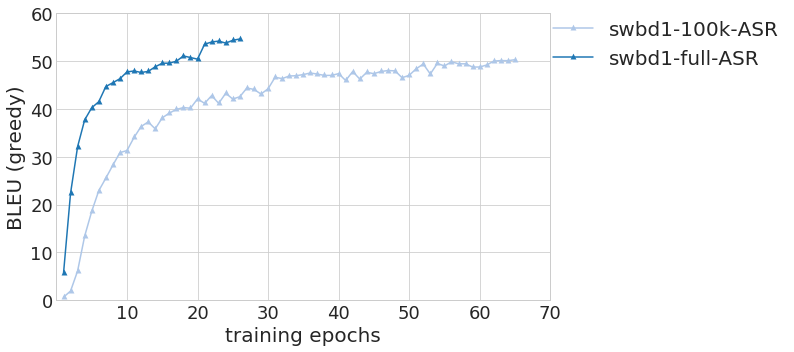

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.plot(log_dev_asr_100k[0], log_dev_asr_100k[2]*100, 
        color=tableau20[1], linestyle="-", label="swbd1-100k-ASR",
        marker='^', markersize=1, markerfacecolor="w", markeredgewidth=3)

ax.plot(log_dev_asr_nodev[0], log_dev_asr_nodev[2]*100, 
        color=tableau20[0], linestyle="-", label="swbd1-full-ASR",
        marker='^', markersize=1, markerfacecolor="w", markeredgewidth=3)

ax.set_xlabel('training epochs', size=20)
ax.set_ylabel('BLEU (greedy)', size=20)

plt.xticks(list(range(10,90,10)), rotation=0, fontsize=20)

plt.ylim(0,60)
plt.xlim(0,70)

for tl in ax.get_yticklabels()+ax.get_xticklabels():
    tl.set_fontsize(18) 
plt.legend(bbox_to_anchor=(1.5, 1.04), framealpha=0, fontsize=20)
plt.tight_layout()

### In progress

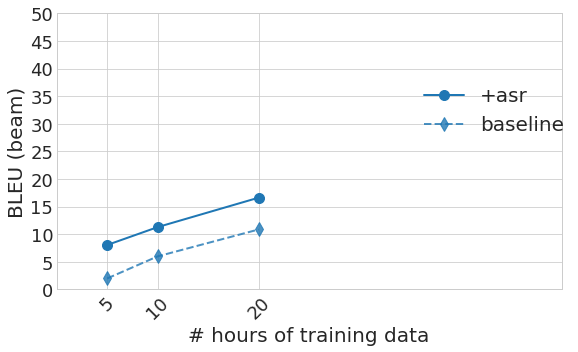

In [9]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1, sharey=True)

markersize = 10
linewidth = 2
alpha = 1

ax.plot(x_scale, bleu_scores_asr, label="+asr", color=tableau20[0], 
        linewidth=linewidth, alpha=alpha, 
        marker='o', markersize=markersize, linestyle="-")

ax.plot(x_scale, bleu_scores_baseline, label="baseline", color=tableau20[0], 
        linewidth=linewidth, alpha=0.8, 
        marker='d', markersize=markersize, linestyle="--")

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }


plt.xticks(x_scale, x_labels, rotation=45, fontsize=18)
# plt.yticks(list(range(0,65,10))+[76, 71, ], rotation=0, fontsize=20)
plt.yticks(list(range(0,51,5)), rotation=0, fontsize=20)
ax.set_xlabel('# hours of training data', size=20)
ax.set_ylabel('BLEU (beam)', size=20)
for i in ax.get_xticklabels():
    i.set_fontsize(18)
for i in ax.get_yticklabels():
    i.set_fontsize(18)

plt.ylim(0,50)
plt.xlim(0,50)

plt.legend(bbox_to_anchor=(1.04, 0.8), framealpha=0, fontsize=20, ncol=1)


fig.tight_layout()